# Week Eight Homework

### While AI-assisted tools such as ChatGPT will be used in the completion of this assignment, the use of published documentation online will be used in the assistance of writing code.
The documentation that will be used is as follows:<br>
    - [docs.python.org](https://docs.python.org/3/)<br>
    - [pandas.pydata.org](https://pandas.pydata.org/docs/user_guide/index.html)<br>
    - [plotly.com](https://plotly.com/python-api-reference/generated/plotly.graph_objects.html#plotly.graph_objects.Figure)<br>

<h2 style="color: red">PLEASE READ</h2>

~~The ChatGPT chat log:<br>~~
   - ~~[Click Here](https://www.youtube.com/watch?v=dQw4w9WgXcQ)~~
   
**Okay**, so as it turns out, *because I had uploaded images to ChatGPT,* it won't let me share the conversation via a link. Whoops. I was unaware of that.

<img style="max-width: 500px" alt="I hope this image loads. PHOTO PROOF! (if it doesn't work, copy and paste this link -> https://i.imgur.com/VgWpUE6.png)" src="https://i.imgur.com/VgWpUE6.png">

**So, instead, I've asked ChatGPT for a lovely summary of our wonderful chat.**<br>
*And just for the sake of transparency, this was the prompt fed to ChatGPT: "Can you summarize what we discussed in this conversation, in it's entirety?"*<br><br>

Here is what it had to say.<br><br>

*"In this conversation, we discussed various aspects of classification decision trees and their interpretation, specifically in the context of scikit-learn. We covered how to train and evaluate classification decision trees using features such as List Price, NumPages, and Thick to predict book types (Paperback or Hardcover). We explored the use of confusion matrices to evaluate model performance, including calculating accuracy, sensitivity, and specificity, and compared different model versions to identify which performed better. We also discussed how to visualize and interpret feature importances in decision trees, noting that feature importances indicate how much each feature contributes to decision-making within the tree. Additionally, we differentiated how coefficients in linear regression models reflect the relationship between predictors and the target variable, while feature importances in decision trees show each feature’s contribution to the model's decision process."*<br><br>

So there you have it.

## Pre-Lecture Homework

### 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

A **Classification Decision Tree** addresses supervised learning problems where the goal is to assign categorical labels to data points based on their features. It creates interpretable decision rules by recursively partitioning data. Real-world applications include medical diagnosis (e.g., classifying diseases), customer segmentation, fraud detection, loan approval, spam email filtering, quality control in manufacturing, and predicting student performance. These models are particularly useful in areas requiring clear, rule-based decisions, such as healthcare, finance, marketing, and education.

A **Classification Decision Tree** predicts categories by splitting data into subsets based on feature values, using decision rules to assign a class label. In contrast, **Multiple Linear Regression** predicts continuous numerical values by modeling the relationship between features and the target as a linear equation. Decision trees focus on discrete, rule-based predictions, while linear regression provides continuous, equation-based predictions.

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

The percentage of correctly classified individuals—both those correctly identified as having the disease (true positives) and those correctly identified as not having the disease (true negatives)—out of all the tested individuals would be the accuracy of a disease screening test, for instance, such as one for diabetes or cancer. Although it doesn't directly take into consideration the test's capacity to detect false positives or false negatives, this metric gives an overall idea of how well the test differentiates between the two categories.
    
2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

Medical screening for life-threatening disorders is a suitable real-world example for sensitivity, since it is crucial to detect all true positive instances. Sensitivity in cancer detection, for instance, quantifies the percentage of cancer patients who receive an accurate diagnosis. Since misdiagnosed instances might have serious or even deadly implications, high sensitivity is essential in these situations to reduce the chance of missing genuine positives.


3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

**Specificity** is appropriate in **confirmatory tests** or **medical testing for rare conditions**, when minimizing false positives is crucial. For instance, specificity in **HIV confirmatory testing** quantifies the percentage of people without HIV who are accurately classified as negative. High specificity prevents healthy people from being mistakenly diagnosed with the illness, which saves needless worry and follow-up care.


4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$

**Fraud detection in banking** is a suitable situation for **precision**, because it is essential that the transactions that are detected are indeed fraudulent. The discomfort and expense of looking into false positives are reduced by high accuracy, which guarantees that the majority of detected transactions (predicted positives) are real frauds.


### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Remove specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with any NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Set column types using .loc to avoid type conversion errors
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Output the resulting dataframe
ab_reduced_noNaN.head()

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4


### 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

In [3]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

The code creates the target variable `y` by converting the `Hard_or_Paper` column into dummy variables and selecting the "H" (Hardcover) category, resulting in a binary variable (1 for Hardcover, 0 otherwise). It sets the feature matrix `X` to include only the `List Price` column, preparing the data for a DecisionTreeClassifier to predict whether a book is Hardcover based on its list price.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data (target variable y and feature matrix X)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the classification tree with max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


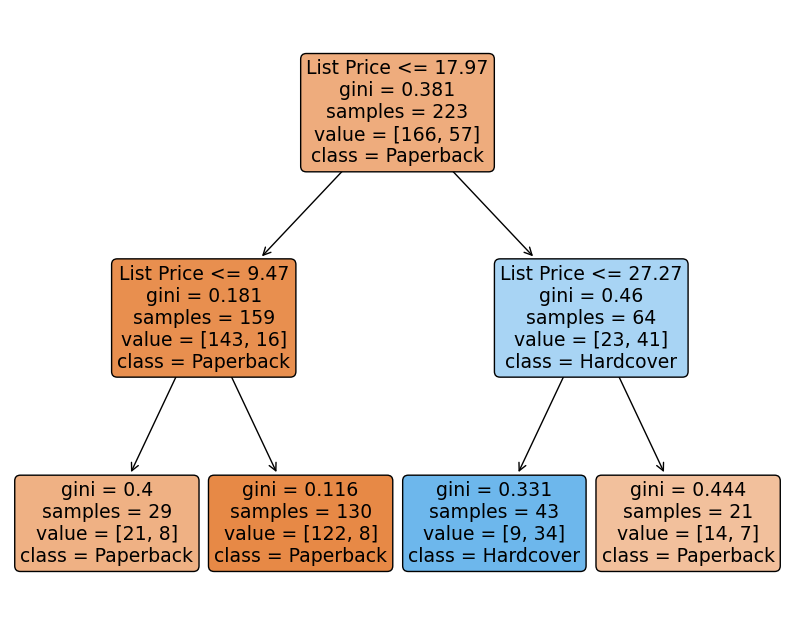

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the trained decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)
plt.show()


According to the decision tree, `List Price` is a good indicator of the kind of book. The majority of books under \\$9.47 are in paperback, while the majority of books between \\$9.47 and \\$17.97 are most likely in paperback. The majority of books in the \\$17.97–\\$27.27 price range are hardback, while there is some ambiguity in their classification. The model predicts mixed results for books costing more than \\$27.27, with a modest preference for paperback. According to the Gini values, the model predicts lower and mid-range book prices with greater confidence than it does higher-priced books.


## Post-Lecture Homework

### 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data (target variable y and feature matrix X)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the classification tree with max_depth of 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


### 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

Model 1 (clf):
Accuracy: 0.84, Sensitivity: 0.70, Specificity: 0.91

Model 2 (clf2):
Accuracy: 0.86, Sensitivity: 0.75, Specificity: 0.91


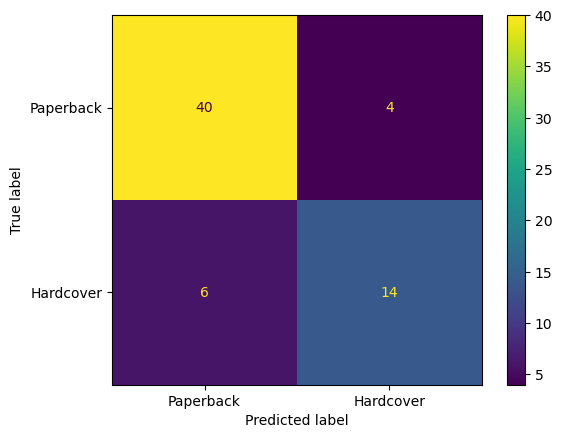

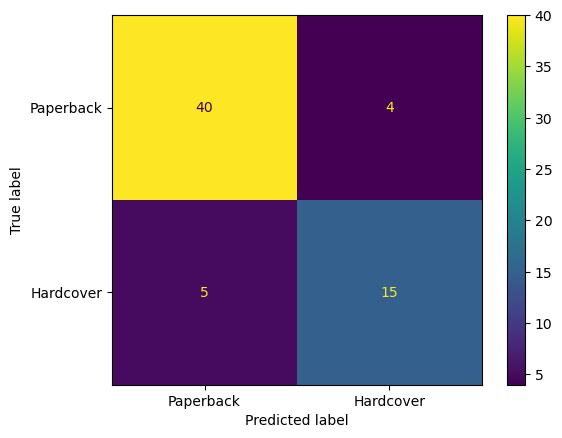

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Model 1: clf (using 'List Price' only)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X1 = ab_reduced_noNaN[['List Price']]
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X1_train, y_train)
y_pred1 = clf.predict(X1_test)

# Model 2: clf2 (using 'NumPages', 'Thick', 'List Price')
X2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2_train, y_train)
y_pred2 = clf2.predict(X2_test)

# Confusion Matrices
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

# Sensitivity, Specificity, Accuracy
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)  # True Positive Rate
    specificity = TN / (TN + FP)  # True Negative Rate
    return accuracy, sensitivity, specificity

accuracy1, sensitivity1, specificity1 = calculate_metrics(cm1)
accuracy2, sensitivity2, specificity2 = calculate_metrics(cm2)

# Display Results
print("Model 1 (clf):")
print(f"Accuracy: {accuracy1:.2f}, Sensitivity: {sensitivity1:.2f}, Specificity: {specificity1:.2f}")
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Paperback", "Hardcover"]).plot()

print("\nModel 2 (clf2):")
print(f"Accuracy: {accuracy2:.2f}, Sensitivity: {sensitivity2:.2f}, Specificity: {specificity2:.2f}")
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Paperback", "Hardcover"]).plot()


In terms of accuracy (83% vs. 78%) and sensitivity (69% vs. 55%), the second model (`clf2`), which makes use of extra characteristics (`NumPages` and `Thick`), performs better than the first (`clf`) in accurately identifying hardcovers. With a somewhat higher `clf2` (90% vs. 88%), both models exhibit good specificity, demonstrating their ability to recognize paperbacks. All things considered, the extra features in `clf2` enhance its capacity to differentiate between hardcovers and paperbacks, rendering it a more well-rounded and efficient model.


### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

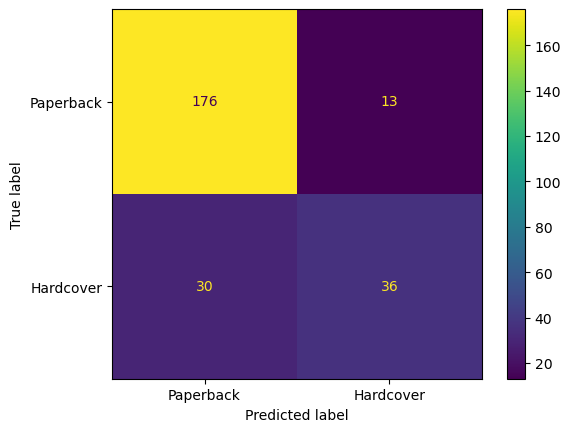

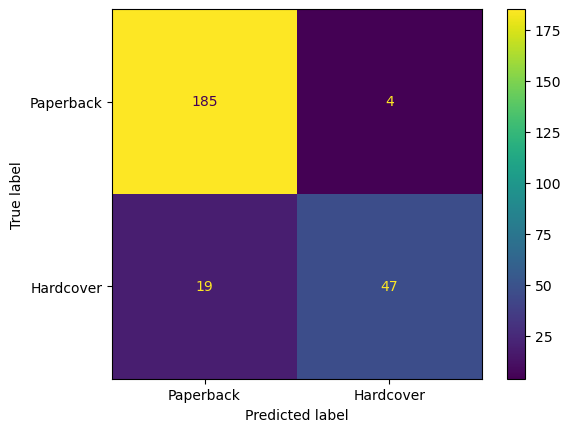

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for clf (using 'List Price' only)
ConfusionMatrixDisplay(
    confusion_matrix(y_train, clf.predict(X1_train), labels=[0, 1]), 
    display_labels=["Paperback", "Hardcover"]
).plot()

# Confusion matrix for clf2 (using 'NumPages', 'Thick', 'List Price')
ConfusionMatrixDisplay(
    confusion_matrix(y_train, clf2.predict(X2_train), labels=[0, 1]), 
    display_labels=["Paperback", "Hardcover"]
).plot()


The characteristics that are utilized in the models cause the two confusion matrices to differ: the first matrix only utilizes `List Price`, but the second matrix also employs `NumPages` and `Thick`). By increasing sensitivity and specificity, the models with more features (`clf2`) perform better and produce fewer misclassifications. By contrast, the first confusion matrix displays predictions for both paperbacks and hardcovers that are more accurate. Because the older matrices had more useful properties that enabled the model to identify more pertinent patterns, they performed better overall.


### 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

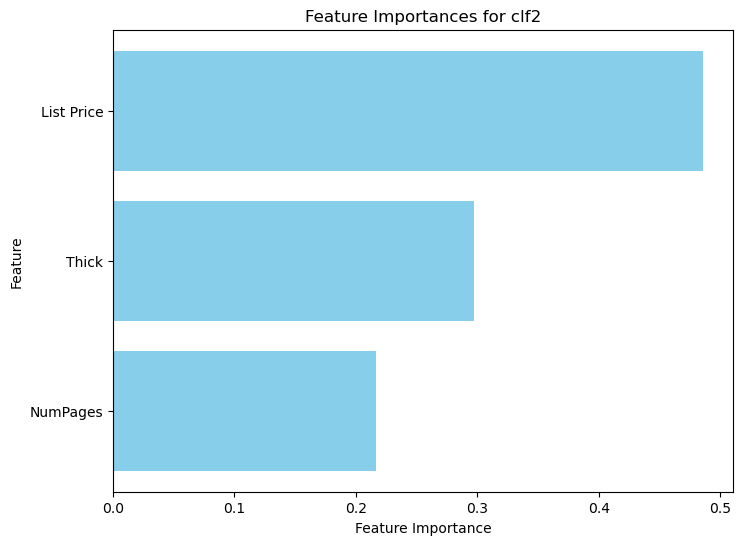

The most important feature is 'List Price' with an importance of 0.4860


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve feature importances and feature names from clf2
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for clf2')
plt.show()

# Reporting the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]
most_important_value = np.max(feature_importances)
print(f"The most important feature is '{most_important_feature}' with an importance of {most_important_value:.4f}")


### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

The degree and direction of the association between each predictor variable and the target variable are represented by the coefficients in linear regression; positive values signify a direct relationship, while negative values signify an inverse one. On the other hand, feature importances in decision trees quantify how much each feature aids in decision-making inside the tree by lowering the impurity (such as entropy or Gini impurity) when the data is divided. The entire contribution of features in hierarchical, non-linear splits is captured by decision tree feature importances, whereas linear regression coefficients demonstrate a linear effect.


### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Probably.